# **How to get NYTIMES API**

https://developer.nytimes.com/

해당 홈페이지에서 기본적인 회원 가입 이후 홈페이지 우측 상단의 Get Started 를 클릭하여 안내에 따라 진행한다 하루 정도의 시간을 여유있게 고려하여 신청할 것

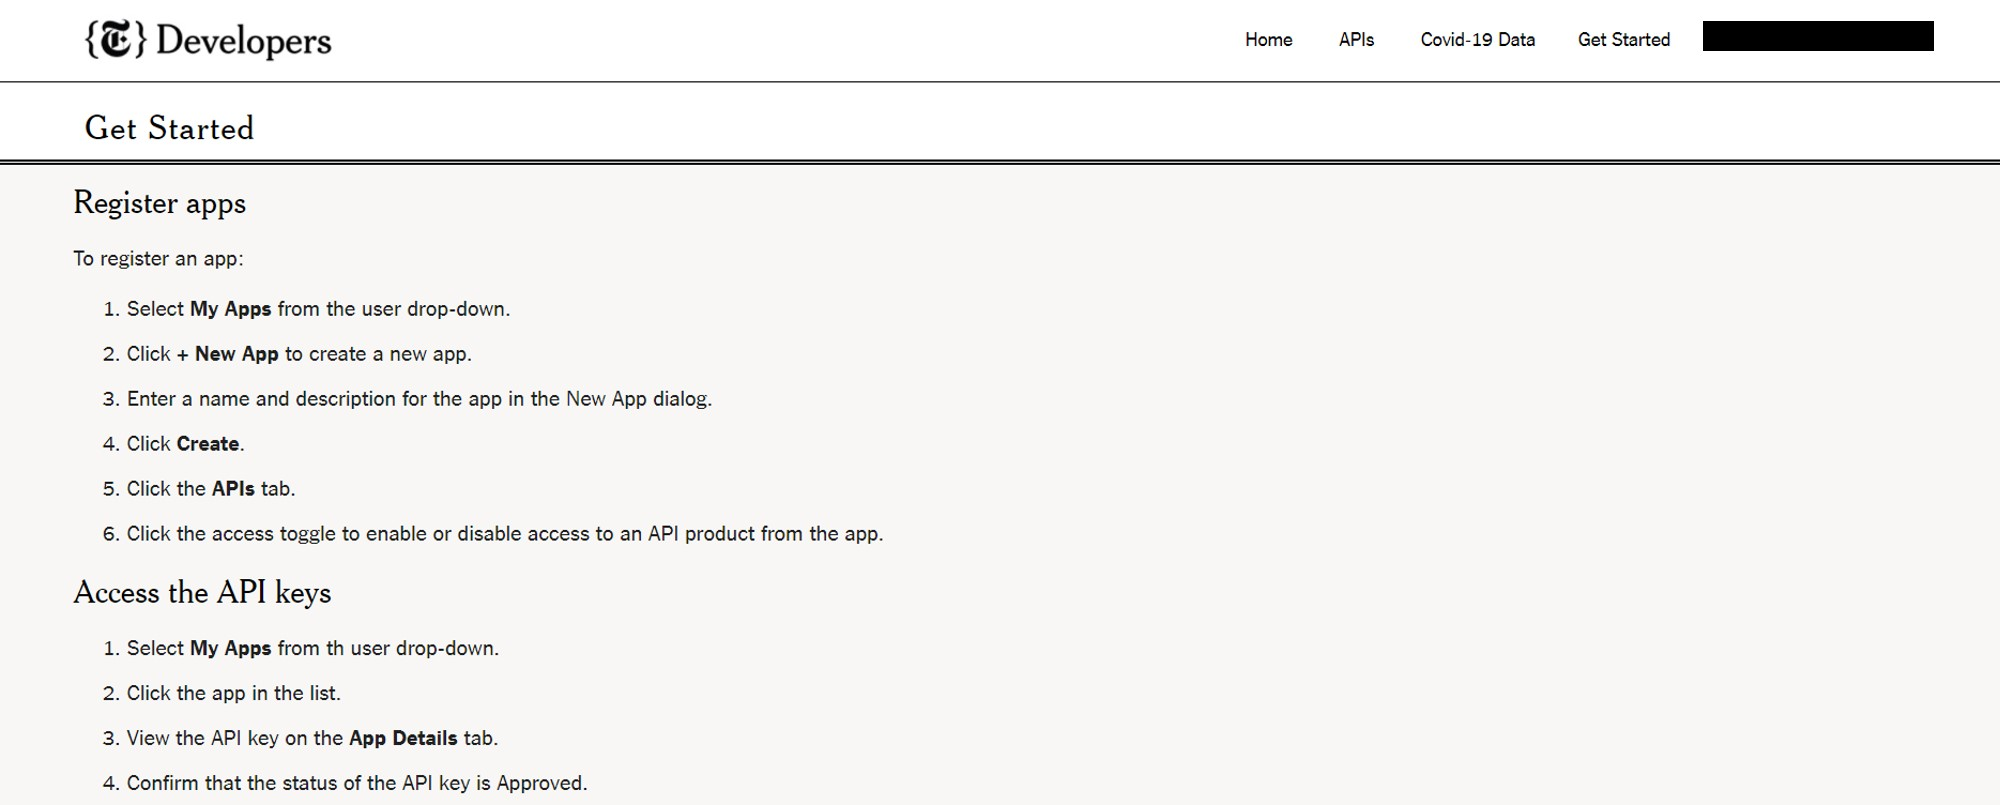

뉴욕타임즈의 API는 본인의 자료 수집 목적에 따라 API 카테코리를 선택할 수 있는데 여기서는 Article Search API 를 선택하여 뉴욕타임즈에 실리는 전체 기사와 metadata를 수집한다

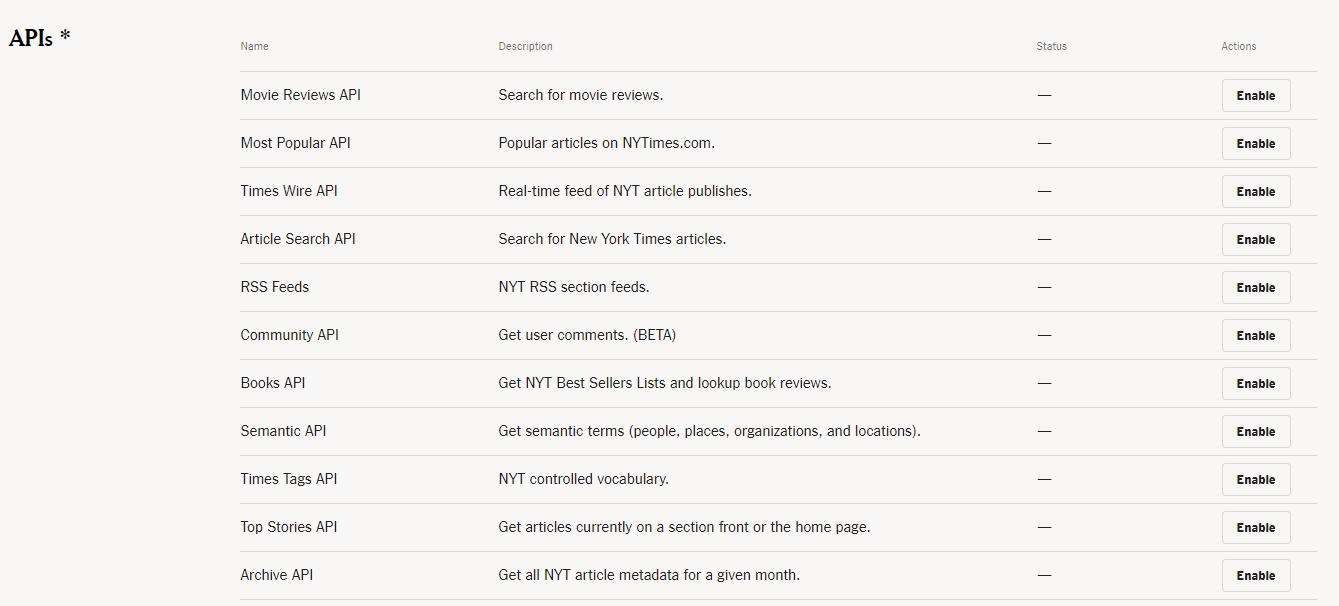

# **Articles from New York Times using API**

**pynytimes 0.4.1:** A Python wrapper for (most) New York Times APIs

* pypi: https://pypi.org/project/pynytimes/

* github: https://github.com/michadenheijer/pynytimes

In [ ]:
!pip install --upgrade pynytimes &> /dev/null

from bs4 import BeautifulSoup
import requests
import urllib.request

import pandas as pd
import datetime
import re
import time
import pickle

import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

nltk.download('punkt')
nltk.download('stopwords')

from pynytimes import NYTAPI

pd.set_option('display.max_colwidth', -1) # each column width maximum

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


API key from The New York Times Dev Portal: https://developer.nytimes.com/get-started

In [ ]:
NYT = NYTAPI("insert your API Key here", https=False)

# **Article search :** search all New York Times articles

* **query:** What you want to search for
* **results:** The amount of results that you want to receive
* **dates:** A dictionary of the dates you'd like the results to be between
  
  * begin:	Results should be published at or after this date	datetime.datetime	False

  * end:	Results should be published at or before this date	datetime.datetime	False
* **options (optional):** Type of Source / a dictionary of additional options / 'news_desk' or 'type_of_material' can search from https://developer.nytimes.com/docs/articlesearch-product/1/overview (find 'news desk value' or ' type of matrial')



In [ ]:
ARTICLES = []

def get_nyt_api(period):
    for i in range(0, len(period)): # because of time difference between Korean and U.S server, start from 2nd value (not 1st value)
        ARTICLE = NYT.article_search(  
            query = KEYWORD,
            results = 50, # the number is meanless, but consider how many articles are issued in just one day
            dates = {
                "begin": period[i],
                "end": period[i]
            },
            options = {
                "sort": "oldest",
                "sources": [
                    "New York Times"
                ]
            }
        )
        ARTICLES.extend(ARTICLE)

In [ ]:
## Choose data period and keyword

START = datetime.datetime.strptime("2021, 01, 01", "%Y, %m, %d") # start date query
END = datetime.datetime.strptime("2021, 01, 31", "%Y, %m, %d") # end date query
DATE_VECTOR = [START + datetime.timedelta(days=x) for x in range(0, (END-START).days+1)] # dates as numeric vector

KEYWORD = 'human rights'

In [ ]:
get_nyt_api(DATE_VECTOR)

In [ ]:
len(ARTICLES)

197

In [ ]:
## Look at data structure
ARTICLES[0]

{'_id': 'nyt://article/fefb9091-242b-55cb-a44d-db4032c907d9',
 'abstract': 'Nicolas Cadène sees the failings of France’s secular model even as he upholds it.',
 'byline': {'organization': None,
  'original': 'By Roger Cohen',
  'person': [{'firstname': 'Roger',
    'lastname': 'Cohen',
    'middlename': None,
    'organization': '',
    'qualifier': None,
    'rank': 1,
    'role': 'reported',
    'title': None}]},
 'document_type': 'article',
 'headline': {'content_kicker': None,
  'kicker': 'THE SATURDAY PROFILE',
  'main': 'An Embattled Public Servant in a Fractured France',
  'name': None,
  'print_headline': 'In France, Defending Laïcité With Tough Love',
  'seo': None,
  'sub': None},
 'keywords': [{'major': 'N',
   'name': 'glocations',
   'rank': 1,
   'value': 'France'},
  {'major': 'N', 'name': 'persons', 'rank': 2, 'value': 'Cadene, Nicolas'},
  {'major': 'N',
   'name': 'subject',
   'rank': 4,
   'value': 'Religion-State Relations'},
  {'major': 'N',
   'name': 'subject',


In [ ]:
from google.colab import drive # mount Google Drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
## If you save all information from NYT API, save as pickle format

with open('/content/drive/MyDrive/소셜빅데이터분석_2021/NYTAPI_TEST.pickle', 'wb') as f:
    pickle.dump(ARTICLES, f)

In [ ]:
TITLE_OF_ARTICLE = []
URL_OF_ARTICLE = []
DATE_OF_ARTICLE = []

def get_nytimes_info(URLS):
  for i in range(0, len(URLS)):
      TITLE_OF_ARTICLE.append(URLS[i]['headline']['main']) # headline
      URL_OF_ARTICLE.append(URLS[i]['web_url']) # article link
      DATE_OF_ARTICLE.append(str(URLS[i]['pub_date'][0:10])) # publish time

get_nytimes_info(ARTICLES)

In [ ]:
GET_LINK = pd.DataFrame(list(zip(TITLE_OF_ARTICLE, URL_OF_ARTICLE, DATE_OF_ARTICLE)), columns =['Title', 'Url', 'Date'])
GET_LINK.head()

,Title,Url,Date
0,An Embattled Public Servant in a Fractured France,https://www.nytimes.com/2021/01/01/world/europe/an-embattled-public-servant-in-a-fractured-france.html,2021-01-01
1,What to Know About the Afghan Peace Talks,https://www.nytimes.com/2021/01/01/world/asia/afghanistan-peace-talks.html,2021-01-01
2,"Before Embracing America-First Agenda, David Perdue Was an Outsourcing Expert",https://www.nytimes.com/2021/01/01/us/politics/david-perdue-georgia-senate.html,2021-01-01
3,How Israel Became a World Leader in Vaccinating Against Covid-19,https://www.nytimes.com/2021/01/01/world/middleeast/israel-coronavirus-vaccines.html,2021-01-01
4,"‘Year of the Reveal’: Runoffs Follow Pandemic, Protests and a Test of Atlanta’s Promise",https://www.nytimes.com/2021/01/02/us/georgia-runoff-atlanta-.html,2021-01-02


In [ ]:
## Save dataframe into GoogleDrive

GET_LINK.to_csv(f'/content/drive/MyDrive/소셜빅데이터분석_2021/NYT_GET_LINK_{str(START)[0:10]}_{str(END)[0:10]}.csv', encoding = 'utf-8-sig', # 윈도우에서 코랩으로 csv 저장시 인코딩 유의
                index_label = False, index = False)

# **scrapping contents from API**

In [ ]:
# from google.colab import drive # mount Google Drive
# drive.mount('/content/drive/', force_remount=True)

In [ ]:
## If you read previous collected API data, load pickle file

# with open('/content/drive/MyDrive/소셜빅데이터분석_2021/NYT_API.pickle', 'rb') as f:
#     ARTICLES = pickle.load(f)

뉴욕타임즈 API에서는 기사에 대한 링크는 수집할 수 있지만 기사 본문은 요약 형태로 제공되기 때문에 획득한 개별 기사 링크를 통해 기사 전체를 크롤링하는 작업이 추가로 필요하다

In [ ]:
## Crawling 1st article 

URL_TAG = urllib.request.urlopen(ARTICLES[0]['web_url'])
SOURCE = BeautifulSoup(URL_TAG, 'lxml', from_encoding='utf-8')
URL_CONTENT = str(SOURCE.select('div.css-53u6y8 > p'))
URL_CONTENT = re.sub('<.+?>', '', URL_CONTENT, 0)
print(URL_CONTENT)

[PARIS — France is in theory a nondiscriminatory society where the state upholds strict religious neutrality and people are free to believe, or not, in any God they wish. It is a nation, in its self image, that through education dissolves differences of faith and ethnicity in a shared commitment to the rights and responsibilities of French citizenship., This model, known as laïcité, often inadequately translated as secularism, is embraced by a majority of French people. They or their forebears became French in this way. No politician here would utter the words “In God we trust.” The Roman Catholic Church was removed more than a century ago from French public life. The country’s lay model supplants any deity., But, in a country with an uneasy relationship to Islam, laïcité is also contested as the shield behind which France discriminates against its large Muslim population and avoids confronting its prejudices. As a result, the job of Nicolas Cadène, a mildly disheveled official with a 

In [ ]:
from urllib.error import HTTPError

TITLE_OF_ARTICLES = []
URL_OF_ARTICLES = []
DATE_OF_ARTICLES = []
CONTENT_OF_ARTICLES = []

def making_nyt_df(URLS):
    for i in range(0, len(ARTICLES)):
        TITLE_OF_ARTICLES.append(ARTICLES[i]['headline']['main']) 
        URL_OF_ARTICLES.append(ARTICLES[i]['web_url'])
        DATE_OF_ARTICLES.append(str(ARTICLES[i]['pub_date'][0:10]))

        REQ = urllib.request.Request(ARTICLES[i]['web_url'],
                                    headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'})
        try:
            SOURCE_CODE = urllib.request.urlopen(REQ)
            HTML_TAG = BeautifulSoup(SOURCE_CODE, 'lxml', from_encoding='utf-8')
            STRING_ITEM = ''
            for ITEM in HTML_TAG.select('div.css-53u6y8 > p'):
                STRING_ITEM += ITEM.get_text() # paragraph 단위로 있는 기사 본문을 stack처럼 쌓고 append 로 list 처리
            CONTENT_OF_ARTICLES.append(STRING_ITEM)
        except HTTPError as ERR: # 기사 링크는 있으나 기사 본문이 지워진 링크 처리
            if ERR.code == 404:
                CONTENT_OF_ARTICLES.append('404 NOT FOUND')

        if i % 20 == 0:
            time.sleep(2)
            print(f'{i}nd article complete')            

In [ ]:
making_nyt_df(ARTICLES)

0nd article complete
20nd article complete
40nd article complete
60nd article complete
80nd article complete
100nd article complete
120nd article complete
140nd article complete
160nd article complete
180nd article complete


In [ ]:
# The news data collected in the scraping process will be appended to this dataframe.

NYTDATA = pd.DataFrame(list(zip(TITLE_OF_ARTICLES, URL_OF_ARTICLES, CONTENT_OF_ARTICLES, DATE_OF_ARTICLES)), columns =['Title', 'Url', 'Content', 'Date'])
NYTDATA.head()

Title  ...        Date
0  An Embattled Public Servant in a Fractured France                                        ...  2021-01-01
1  What to Know About the Afghan Peace Talks                                                ...  2021-01-01
2  Before Embracing America-First Agenda, David Perdue Was an Outsourcing Expert            ...  2021-01-01
3  How Israel Became a World Leader in Vaccinating Against Covid-19                         ...  2021-01-01
4  ‘Year of the Reveal’: Runoffs Follow Pandemic, Protests and a Test of Atlanta’s Promise  ...  2021-01-02

[5 rows x 4 columns]

In [ ]:
## 크롤링된 게시물 중에서 동영상, 퀴즈 등 신문기사가 아닌 것들이 존재하는데 그것들은 빈칸으로 남겨짐
# 따라서 빈 곳을 인덱싱한 후 제거하는 명령어 입력
del_raw = NYTDATA[NYTDATA['Content'] == ''].index # 기사본문이 들어간 Content 열에서 내용이 없이 '' 로 확인되는 열 인덱싱
NYTDATA_PRE = NYTDATA.drop(del_raw)

print(NYTDATA.shape[0]) # 변경된 데이터프레임 행 개수 확인
print(NYTDATA_PRE.shape[0])

197
193


In [ ]:
## Save dataframe into GoogleDrive

NYTDATA_PRE.to_csv(f'/content/drive/MyDrive/소셜빅데이터분석_2021/NYTDATA_{str(START)[0:10]}_{str(END)[0:10]}.csv', encoding = 'utf-8-sig',
                index_label = False, index = False)

# **Preprocessing**

* converting all letters to lower or upper case
* converting numbers into words or removing numbers
* removing punctuations, accent marks and other diacritics
* removing white spaces
* expanding abbreviations
* removing stop words, sparse terms, and particular words
* etc...

In [ ]:
#stop_words = stopwords.words('english')

In [ ]:
## lowercases, tokenizes, de-accents(문단 기호 없애는 것...punctuation 등 )

"""
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc), min_len=3) if word not in stop_words] for doc in texts]
"""
#text_no_stops = remove_stopwords(NYTDATA_PRE['Content'])

In [ ]:
## lemmatization (과거형, 현재진행형, 3인칭 단수 등 모두 원형으로 바꿔줌.....work, works, worked 등).....(stemming은 advertisement.을...adverti..이런 식으로 변경).

"""
def lemmatization(sentences, allowed_postags=['NOUN', 'ADJ', 'VERB']): 
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in sentences:
        doc = nlp(" ".join(sent)) #nlp 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out
"""

#text_lemmatized = lemmatization(text_no_stops, allowed_postags=['NOUN'])

In [ ]:
#print(len(text_lemmatized)) # 위에서 수집한 기사 개수와 맞는지 확인

#text_lemmatized[0:4]

In [ ]:
## The news data collected in the scraping process will be appended to this dataframe.

#NYTDATA_lem = pd.DataFrame(list(zip(TITLE_OF_ARTICLES, URL_OF_ARTICLES, text_lemmatized, DATE_OF_ARTICLES)), columns =['Title', 'Url', 'text_lemmatized', 'Date'])
#NYTDATA_lem.head()

In [ ]:
## Save dataframe into GoogleDrive

"""
NYTDATA_lem.to_csv(f'/content/drive/MyDrive/소셜빅데이터분석_2021/NYTDATA_lem_{str(START)[0:10]}_{str(END)[0:10]}.csv', encoding = 'utf-8-sig',
                index_label = False, index = False)
                """